In [ ]:
# Step 1: Load Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Load Dataset
# Using Iris dataset as an example
iris = load_iris()
X = iris.data
y = iris.target
data = pd.DataFrame(data=X, columns=iris.feature_names)
data['target'] = y

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# Step 3: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Step 4: Function to Calculate Gini Index
def gini_impurity(y):
    """ Calculate Gini Impurity of a dataset """
    unique_classes, class_counts = np.unique(y, return_counts=True)
    probabilities = class_counts / len(y)
    gini = 1 - np.sum(probabilities ** 2)
    return gini

In [ ]:
# Print the Gini impurity of the whole dataset
print(f"Gini Impurity of the whole dataset: {gini_impurity(y):.4f}")

Gini Impurity of the whole dataset: 0.6667


In [ ]:
# Step 5: Train Decision Tree Classifier
clf = DecisionTreeClassifier( random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

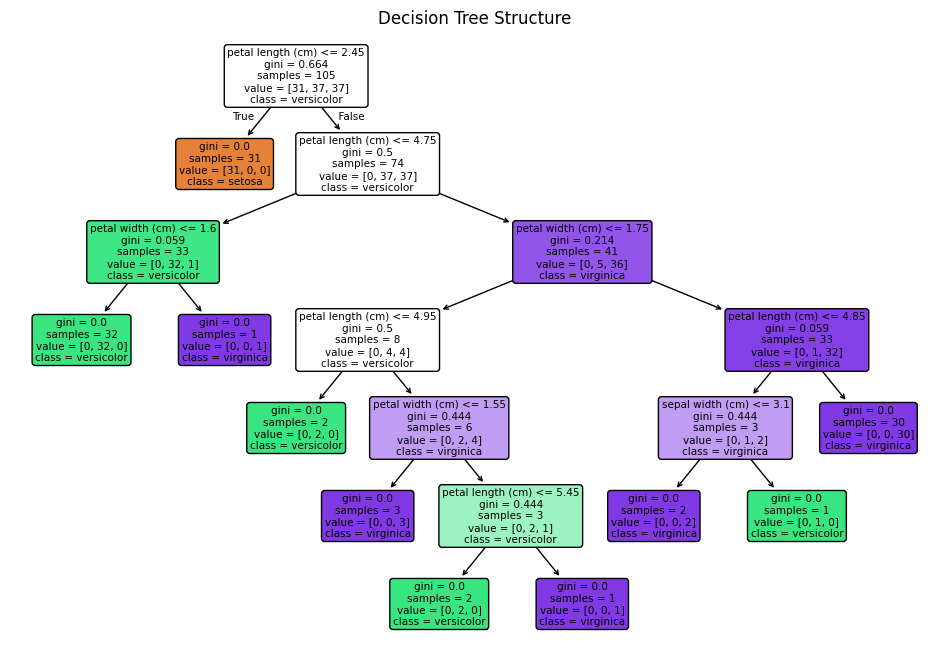

In [ ]:
# Step 6: Plot the Decision Tree Structure
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title('Decision Tree Structure')
plt.show()

In [ ]:
# Step 7: Evaluate the Model
# Make predictions on the training and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [ ]:
# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 1.0000


In [ ]:

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Testing Accuracy: 1.0000


In [ ]:

# Print classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))


Classification Report (Test Data):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:

# Print confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Data):")
print(conf_matrix)


Confusion Matrix (Test Data):
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


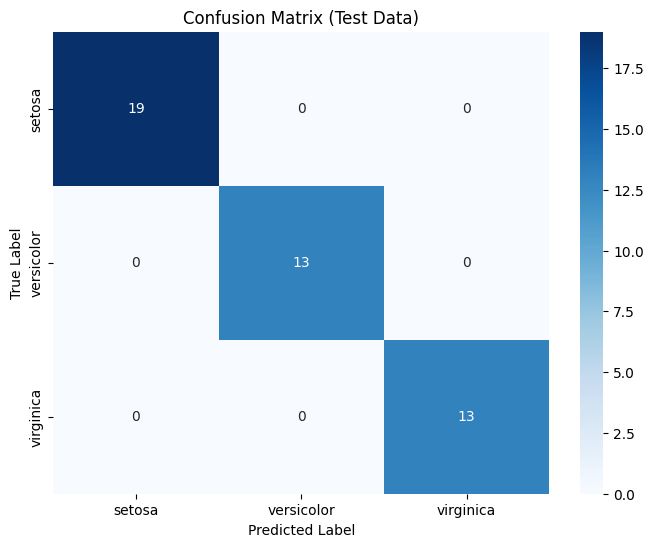

In [ ]:


# Plot confusion matrix for test data
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
